# TITANIC SURVIVAL PREDICTION

# Binary Classification Problem

# Target Variables

## 1: Survived , 0: Dead

# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings

C:\Users\usama\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing The Dataset

In [2]:
df = pd.read_csv("titanic.csv")

### verifying it is a "dataframe" object in pandas

In [3]:
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

In [4]:
#shape of the dataset
df.shape

(418, 12)

## Feature of the dataset i.e Columns of Dataset

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Preview the dataset to understand the data

#### printing out first 5 rows of dataset

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Gerenrate 5 sample rows or column

In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
295,1187,0,3,"Angheloff, Mr. Minko",male,26.00,0,0,349202,7.8958,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.9000,C105,C
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.00,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
382,1274,1,3,"Risien, Mrs. Samuel (Emma)",female,NaN,0,0,364498,14.5000,NaN,S


##### Checking Null Values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Handling the null values

In [9]:
columns = ['Age', 'Fare']
for col in columns:
    df[col].fillna(df[col].median(), inplace = True)
    
df['Cabin'].fillna('Unknown', inplace=True)

#### our feature of interest is target Variables

In [11]:
print("Total No Of Instances")
print(len(df.Survived.unique()))

Total No Of Instances
2


In [12]:
#looking at unique values
df["Survived"].unique()
# 1 for Alive
# 0 for no Dead

array([0, 1], dtype=int64)

In [13]:
# frequency distribution of target variable
# number of instances (rows) that belong to each class
df.groupby("Survived").size()

Survived
0    266
1    152
dtype: int64

since target variable have two values i.e 0 or 1

so this is a classification problem

binary classification problem

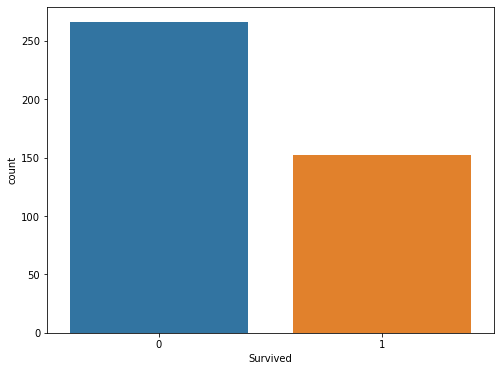

In [14]:
#visualizing the frequency distribution
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="Survived", data=df)
plt.show()

# Discription

### Statistics of Dataset

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
#getting information about the attributes and thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Class Label or target variable

### analysing the target variable

In [18]:
df["Survived"].describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [20]:
df["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [21]:
df.groupby("Survived").mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1102.620301,2.334586,29.522218,0.379699,0.274436,27.478728
1,1096.789474,2.144737,29.734145,0.565789,0.598684,49.747699


# interpretation of heatmap

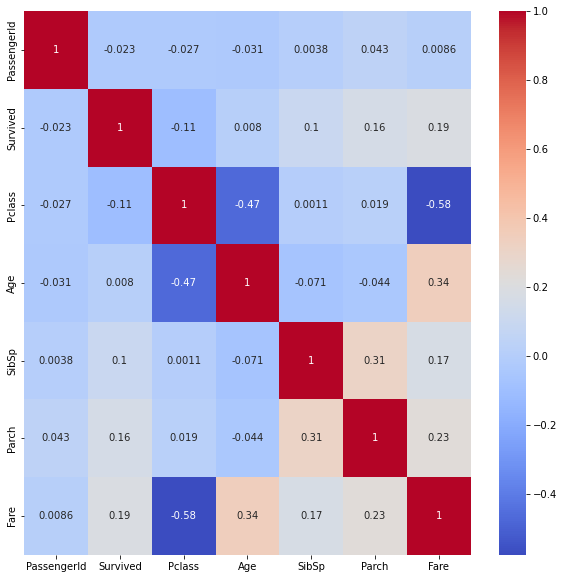

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to show correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].corr(), annot=True, cmap='coolwarm')

plt.show()
   

0 --------> Dead
1 --------> Survived

In [28]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Labeling the ordinal variables

le = LabelEncoder()
cols = ['Sex', 'Ticket', 'Cabin', 'Embarked', 'Name']

for col in cols:
    df[col] = le.fit_transform(df[col])

In [30]:
# Checking the class count for target variable

df.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

# Seperating the features and Target variable

In [31]:
X = df.drop(columns="Survived" , axis=1)
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,3,403,0,47.0,1,0,221,7.0000,76,2
2,894,2,269,1,62.0,0,0,73,9.6875,76,1
3,895,3,408,1,27.0,0,0,147,8.6625,76,2
4,896,3,178,0,22.0,1,1,138,12.2875,76,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,353,1,27.0,0,0,267,8.0500,76,2
414,1306,1,283,0,39.0,0,0,324,108.9000,22,0
415,1307,3,332,1,38.5,0,0,346,7.2500,76,2
416,1308,3,384,1,27.0,0,0,220,8.0500,76,2


In [32]:
Y = df["Survived"]
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [34]:
# Using the SMOTE technique to handle class imbalance

smote = SMOTE(random_state = 42)
X_balanced, y_balanced = smote.fit_resample(X, Y)

# So Now 

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_balanced, y_balanced , test_size=0.2,random_state=2, stratify=Y)

##### if we dont use stratify it is quite possible that all Survived cases may go to X_train and All Dead cases go to X_test

In [36]:
X_train.shape

(425, 11)

In [37]:
X_test.shape

(107, 11)

In [38]:
Y_train.shape

(425,)

In [39]:
Y_test.shape

(107,)

## Summary of train test set

In [40]:
print("Shape Of X_train"+str(X_train.shape))
print("Shape Of Y_train"+str(Y_train.shape))
print("Shape Of X_test"+str(X_test.shape))
print("Shape Of Y_test"+str(Y_test.shape))

Shape Of X_train(425, 11)
Shape Of Y_train(425,)
Shape Of X_test(107, 11)
Shape Of Y_test(107,)


# Training The Model

# Logistic Regression

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score , f1_score,precision_score
from sklearn.model_selection import train_test_split 

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [43]:
Y_pred_lr.shape

(107,)

# To Check the accuracy

In [44]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [45]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy Score achieved using Logistic Regression is "+ str(score_lr)+"%")

The accuracy Score achieved using Logistic Regression is 100.0%


# Confusion matrix and classification report

In [46]:
print(metrics.confusion_matrix(Y_pred_lr,Y_test))
print(classification_report(Y_pred_lr,Y_test))

[[52  0]
 [ 0 55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



# Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [48]:
Y_pred_nb.shape

(107,)

# Checking Accuracy Score

In [49]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy Score achieved using Naive Bayes is "+ str(score_nb)+"%")

The accuracy Score achieved using Naive Bayes is 100.0%


# Confusion matrix and classification report

In [50]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[52  0]
 [ 0 55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



# Support Vector Machine

In [51]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train,Y_train)

Y_pred_svm = sv.predict(X_test)

In [52]:
Y_pred_svm.shape

(107,)

# Checking Accuracy Score

In [53]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy Score achieved using SVM is "+ str(score_svm)+"%")

The accuracy Score achieved using SVM is 100.0%


# Confusion matrix and classification report

In [54]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[52  0]
 [ 0 55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



# K Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)

Y_pred_knn = knn.predict(X_test)

In [56]:
Y_pred_knn.shape

(107,)

# Checking Accuracy Score

In [57]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy Score achieved using K Nearest Neighbors is "+ str(score_knn)+"%")

The accuracy Score achieved using K Nearest Neighbors is 64.49%


# Confusion matrix and classification report

In [58]:
print(metrics.confusion_matrix(Y_pred_knn,Y_test))
print(classification_report(Y_pred_knn,Y_test))

[[32 18]
 [20 37]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        50
           1       0.67      0.65      0.66        57

    accuracy                           0.64       107
   macro avg       0.64      0.64      0.64       107
weighted avg       0.65      0.64      0.65       107



# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,Y_train)

Y_pred_rf = rf.predict(X_test)

In [60]:
Y_pred_rf.shape

(107,)

# Checking Accuracy Score

In [61]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy Score achieved using Random Forest is "+ str(score_rf)+"%")

The accuracy Score achieved using Random Forest is 100.0%


# Confusion matrix and classification report

In [62]:
print(metrics.confusion_matrix(Y_pred_rf,Y_test))
print(classification_report(Y_pred_rf,Y_test))

[[52  0]
 [ 0 55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        55

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



# Final Score

In [63]:
scores = [score_lr,score_nb,score_svm,score_knn,score_rf]

algorithms = ["Logistic Regression","Navie Bayes","Support Vector Machine","K Nearest Neighbors","Random Forest Tress"]

for i in range(len(algorithms)):
    print("The Accuracy Score Achieved Using "+algorithms[i]+" is: "+ str(scores[i])+" %")

The Accuracy Score Achieved Using Logistic Regression is: 100.0 %
The Accuracy Score Achieved Using Navie Bayes is: 100.0 %
The Accuracy Score Achieved Using Support Vector Machine is: 100.0 %
The Accuracy Score Achieved Using K Nearest Neighbors is: 64.49 %
The Accuracy Score Achieved Using Random Forest Tress is: 100.0 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

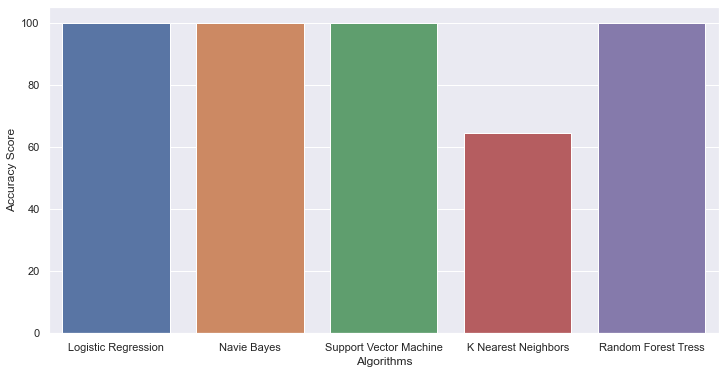

In [64]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(algorithms,scores)

# So From Above Comparision , it can be visualized that Support Vector Machine ,Logistic Regression,Random Forest Tree and Navie Bayes Gives the best Accuracy So I'm Gonna use Support Vector Machine

### accuracy on training data

In [72]:
X_train_prediction = sv.predict(X_train)
training_data_accuracy = round(accuracy_score(X_train_prediction,Y_train)*100,2)
print("The Accuracy on training Data is: "+str(training_data_accuracy)+" %")

The Accuracy on training Data is: 100.0 %


### accuracy on test data

In [73]:
X_test_prediction = sv.predict(X_test)
test_data_accuracy = round(accuracy_score(X_test_prediction,Y_test)*100,2)
print("The Accuracy on test Data is: "+str(test_data_accuracy)+" %")

The Accuracy on test Data is: 100.0 %


# Building A Predictive System

In [74]:
input_data = [892,3,206,1,34.5,0,0,152,7.8292,76,1]

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = sv.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The Person isn't Survived")
else:
    print("The Person is Survived")


[0]
The Person isn't Survived


In [75]:
input_data = [893,3,403,0,47.0,1,0,221,7.0000,76,2]

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = sv.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The Person isn't Survived")
else:
    print("The Person is Survived")


[1]
The Person is Survived
